## Import packages and load data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
LinARs_df = pd.read_csv("adc9507_Data_S1.csv", sep=";", skiprows=2)
LinARs_df = LinARs_df.dropna(axis=1, how="all")
LinARs_df.head()

,Chr,Start,End,LinAR_ID,Nearest_Neighboring_Gene,lncRNA_ID,cCREs_ID,Gene_name,Lineage_name,PhyloP score,P-value,Q-value
0,chr3,82154474,82154736,HLinAR-Rank1,NONE,URS0000EBC6E1_9606,NONE,NONE,Human,"167,07914",0,0
1,chr21,8424934,8425419,HLinAR-Rank2,NONE,URS00019A85AC_9606,NONE,NONE,Human,"97,33254",0,0
2,chr20,63102113,63102273,HLinAR-Rank3*,ENSG00000149658,URS0000EF61E2_9606,EH38E2128905,YTHDF1,Human,"90,33879",0,0
3,chr21,8424387,8424860,HLinAR-Rank4,NONE,URS00019A85AC_9606,NONE,NONE,Human,"88,65024",0,0
4,chr21,8241960,8242395,HLinAR-Rank5,NONE,URS0001A07CFE_9606,NONE,NONE,Human,"81,2051",0,0


## Distribution of LinARs 

In [ ]:
# Data frame size (number of rows = number of LinARs)
LinARs_df.shape

(86409, 12)

In [ ]:
# Total number of lineages
LinARs_df["Lineage_name"].nunique()


67

In [69]:
# Check for LinARs duplicates in lineages
LinARs_duplicates = LinARs_df[LinARs_df.duplicated(subset=["Lineage_name", "Chr", "Start", "End"], keep=False)]
LinARs_duplicates.groupby("Lineage_name").size()


Series([], dtype: int64)

In [70]:
# Number of unique LinARs
LinARs_unique = LinARs_df.drop_duplicates(subset=["Chr", "Start", "End"])
len(LinARs_unique)


71332

In [ ]:
# Number of LinARs shared between species
len(LinARs_df) - len(LinARs_unique) # There were no duplicates within a lineage, therefore the remaining LinARs are shared between species

15077

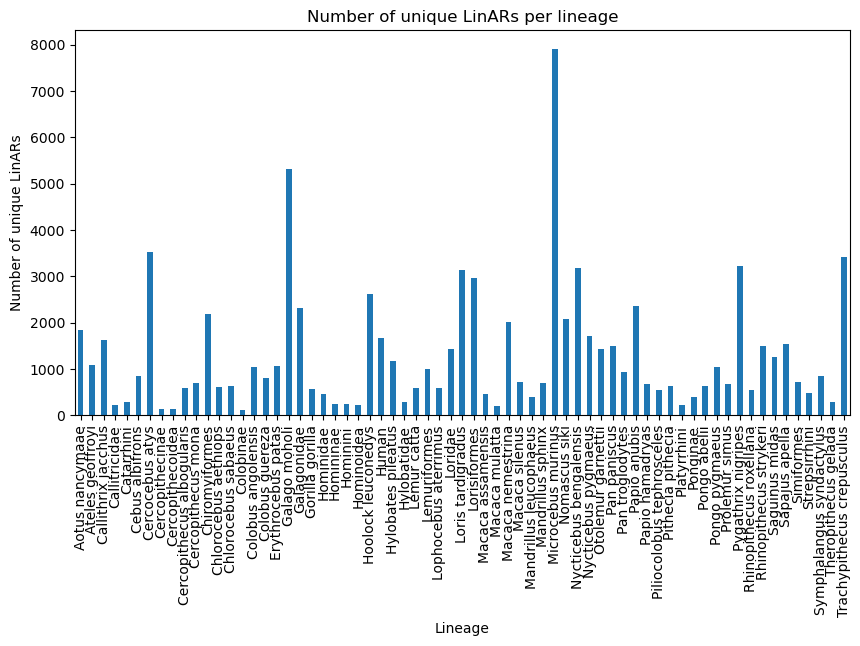

count      67.000000
mean     1289.686567
std      1323.122778
min       110.000000
25%       513.500000
50%       811.000000
75%      1654.000000
max      7915.000000
dtype: float64


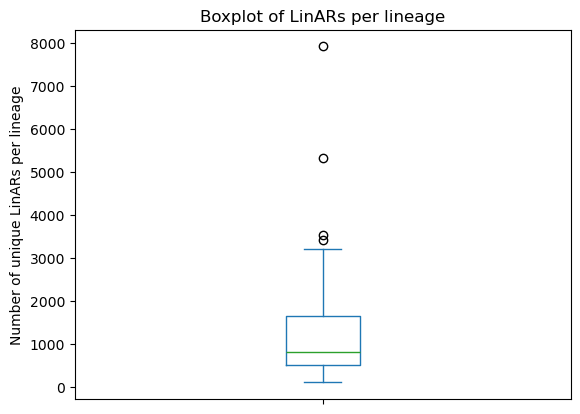

In [78]:
# Number of LinARs per lineage 
LinARs_per_lineage = LinARs_df.groupby("Lineage_name")[["Chr", "Start", "End"]].size()

LinARs_per_lineage.plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of unique LinARs")
plt.xlabel("Lineage")
plt.title("Number of unique LinARs per lineage")
plt.show()

# Summary statistics for number of LinARs per lineage
print(LinARs_per_lineage.describe())

LinARs_per_lineage.plot(kind="box")
plt.ylabel("Number of unique LinARs per lineage")
plt.title("Boxplot of LinARs per lineage")
plt.show()

In [76]:
# Number of LinARs in human and chimpanzee

print("Number of LinARs in human:", LinARs_per_lineage["Human"])
print("Number of LinARs in chimpanzee:", LinARs_per_lineage["Pan troglodytes"])

Number of LinARs in human: 1674
Number of LinARs in chimpanzee: 933


In [ ]:
# Number of conserved elements identified as LinARs in all lineages (regions that exist in all lineages)

n_lineages = LinARs_df["Lineage_name"].nunique()

LinARs_all_lineages = (
    LinARs_df.groupby(["Chr", "Start", "End"])["Lineage_name"]
    .nunique()
    .eq(n_lineages) # Check if the number of unique lineages for each LinAR equals the total number of lineages
)

LinARs_all_lineages.sum()

np.int64(0)

In [ ]:
# Number of conserved elements identified as LinARs in both human and chimpanzee
human = "Human"    
chimp = "Pan troglodytes"  

# Get sets of coordinate tuples for each species
LinARs_human = set(tuple(x) for x in LinARs_df[LinARs_df["Lineage_name"] == human][["Chr", "Start", "End"]].values)
LinARs_chimp = set(tuple(x) for x in LinARs_df[LinARs_df["Lineage_name"] == chimp][["Chr", "Start", "End"]].values)

# Find shared LinARs by coordinates
shared_linars = LinARs_human & LinARs_chimp
len(shared_linars)


119

In [ ]:
# Total number of unique previous identified HARs (LinArs with "*")
LinARs_df.loc[LinARs_df["LinAR_ID"].str.contains("\*"), "LinAR_ID"].nunique()

620

<>:3: SyntaxWarning: invalid escape sequence '\*'
<>:3: SyntaxWarning: invalid escape sequence '\*'
/var/folders/pz/y0tgvym13cg8yjfc14z454cr0000gn/T/ipykernel_81187/801676316.py:3: SyntaxWarning: invalid escape sequence '\*'
  HARs_per_lineage = LinARs_df[LinARs_df["LinAR_ID"].str.contains("\*")].groupby("Lineage_name")[["Chr", "Start", "End"]].size()


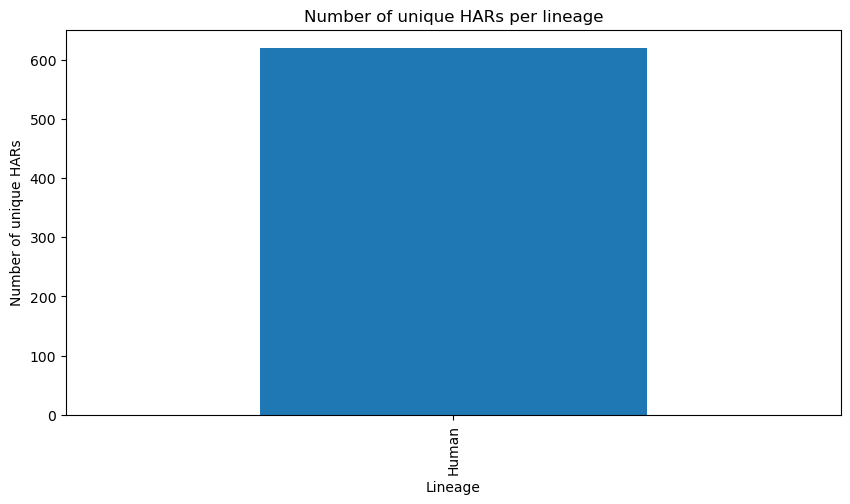

count      1.0
mean     620.0
std        NaN
min      620.0
25%      620.0
50%      620.0
75%      620.0
max      620.0
dtype: float64


In [ ]:
# Number of HARs per lineage (shows that only the human lineage has HARs)

HARs_per_lineage = LinARs_df[LinARs_df["LinAR_ID"].str.contains("\*")].groupby("Lineage_name")[["Chr", "Start", "End"]].size()

HARs_per_lineage.plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of unique HARs")
plt.xlabel("Lineage")
plt.title("Number of unique HARs per lineage")
plt.show()
print(HARs_per_lineage.describe())

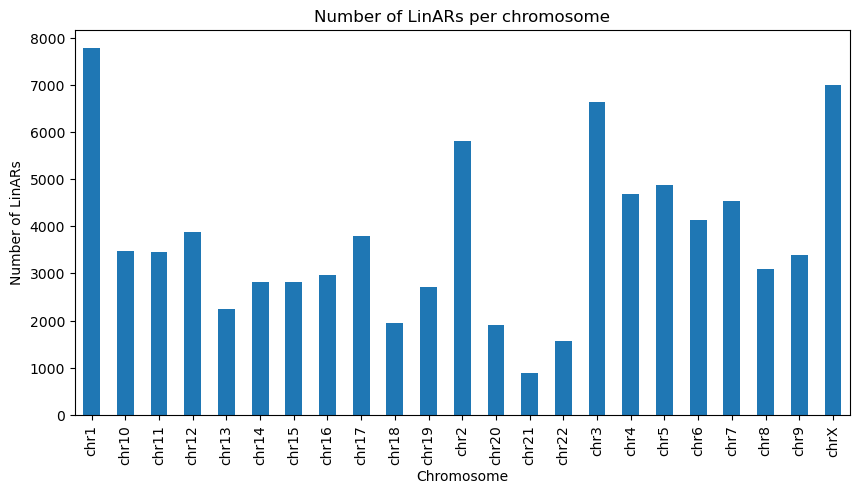

count      23.000000
mean     3756.913043
std      1762.875412
min       885.000000
25%      2760.500000
50%      3449.000000
75%      4612.000000
max      7780.000000
dtype: float64


In [ ]:
# Number of LinARs per chromosome (include multiple count of regions that exist in multiple lineages)

LinARs_per_chromosome = LinARs_df.groupby("Chr").size()       

LinARs_per_chromosome.plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of LinARs")
plt.xlabel("Chromosome")
plt.title("Number of LinARs per chromosome")
plt.show()

print(LinARs_per_chromosome.describe())

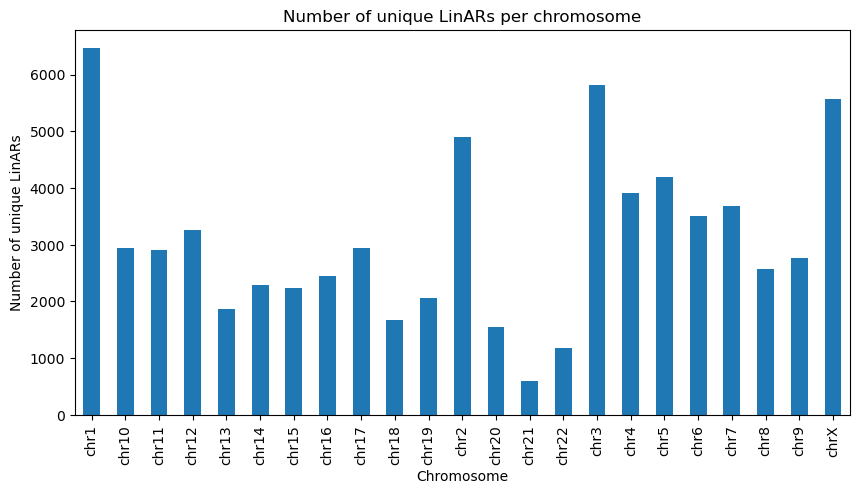

count      23.000000
mean     3756.913043
std      1762.875412
min       885.000000
25%      2760.500000
50%      3449.000000
75%      4612.000000
max      7780.000000
dtype: float64


In [ ]:
# Number of unique accelerated regions per chromosome / Number of unique LinAR coordinates per chromosome (only count each region once, even if it appears in multiple lineages). 


LinARs_per_chromosome_unique = LinARs_df.drop_duplicates(subset=["Chr", "Start", "End"]).groupby("Chr").size()

LinARs_per_chromosome_unique.plot(kind="bar", figsize=(10,5))
plt.ylabel("Number of unique LinAR coordianates")
plt.xlabel("Chromosome")
plt.title("Number of unique LinARs coordinates per chromosome")
plt.show()

print(LinARs_per_chromosome_unique.describe())

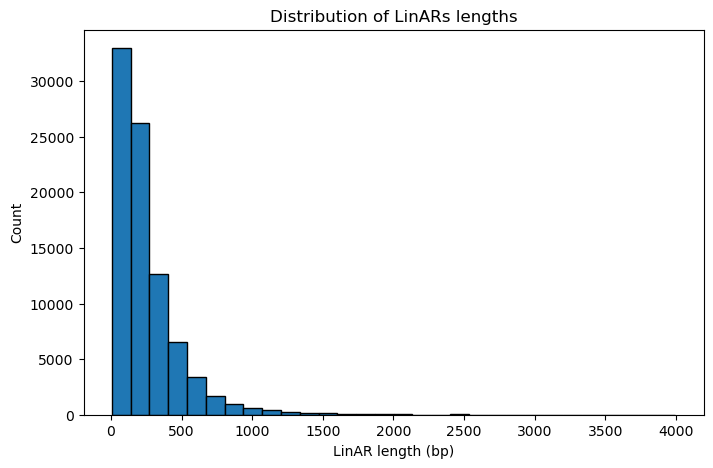

count    86409.000000
mean       252.294263
std        240.355371
min          6.000000
25%        101.000000
50%        181.000000
75%        319.000000
max       3997.000000
Name: Length, dtype: float64


In [86]:
# Distribution of LinAR lengths

LinARs_df["Length"] = LinARs_df["End"] - LinARs_df["Start"]

plt.figure(figsize=(8,5))
LinARs_df["Length"].plot(kind="hist", bins=30, edgecolor="black")
plt.xlabel("LinAR length (bp)")
plt.ylabel("Count")
plt.title("Distribution of LinARs lengths")
plt.show()

print(LinARs_df["Length"].describe())


## Distribution of genes